Computaton of group delay resulted from gain control as in Berry's model
by using a wave packet

adpated from:

https://dspillustrations.com/pages/posts/misc/group-delay-and-phase-delay-example.html


Sept 13, 2021 Created by CKC

In [1]:
import numpy as np
import math
import scipy as sp
from scipy import sparse
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import time

group delay = -0.0006 s


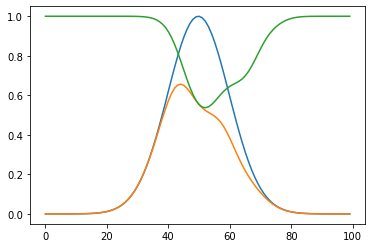

In [2]:
T = 1e-2

Fs = 1e6
f0 = 1e4     # The resonant frequency of the circuit

t = np.arange(0, T, 1/Fs)
envelope = np.exp(-5e5*(t-T/2)**2)
sig0 = np.sin(2*np.pi*f0*t)
sig = envelope * np.sin(2*np.pi*f0*t)


nstep = len(sig)
x = sig.copy() # input signal
gain =np.ones(nstep)
delay = int(10/0.05)
delay = int(800)
B =2
y = x.copy() # output signal

# gain control loop

for i in range(delay,nstep):
    gain[i] = 1/(1+B*y[i-delay]**2)
    y[i]= gain[i]*x[i]


# use the original signal's peak position as the peak positions
# in the output signal. That is: assumed no phase shift between
# input and output (???)

npeak = int(T*f0)
tpeak = np.zeros(npeak)
for i in range(npeak):
    tpeak[i] = (4*i+1)/4/f0

# index to the peak position assuming no phase lag
index = np.array(tpeak*Fs).astype(int)

# arrays with peak heights
ypeak_height = y[index]
xpeak_height = x[index]
gain_at_peak = gain[index]

plt.plot(xpeak_height)
plt.plot(ypeak_height)
plt.plot(gain_at_peak)

group_delay = np.argmax(ypeak_height)-np.argmax(xpeak_height)
print('group delay =',group_delay/f0, 's')

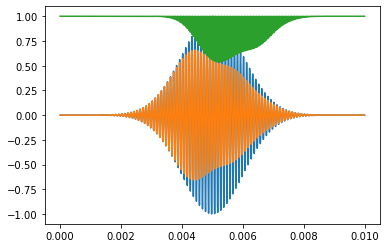

In [3]:
plt.plot(t,x)
plt.plot(t,y)
plt.plot(t,gain)

In [6]:
name = 'GC_WF_wave'

Data = {}
Data['t'] = t
Data['x'] = x
Data['y'] = y
Data['gain'] = gain

Envelope_Data ={}
Envelope_Data['t'] = t[index]
Envelope_Data['xpeak_height'] = xpeak_height
Envelope_Data['ypeak_height'] = ypeak_height
Envelope_Data['gain_at_peak'] = gain_at_peak

data_df = pd.DataFrame(Data)
Envelope_data_df = pd.DataFrame(Envelope_Data)
with pd.ExcelWriter('D:\\GoogleDrive\\retina\\ContrastPaper\\4OriginPlot\\'+name+'.xlsx') as writer:
    data_df.to_excel(writer,'data',float_format='%.6f') # float_format 控制精度
    Envelope_data_df.to_excel(writer,'envelope',float_format='%.6f') # float_format 控制精度